<a href="https://colab.research.google.com/github/rhyanrb/cienciadedadosCesar/blob/main/Projeto_de_Ciencia_de_Dados_Salarios_TJBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto de Ciência de Dados - Prof.: Luciano Barbosa**

Alunos: Percival Barbosa Junior e Rhyan R. Ranzan de Britto

Análise da Folha de Pagamento TJBA

In [1]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=27bd01a52d82563a9489f9106e215177a1fad19ef01e70449fe64e840c810a99
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=31642b514a797e3034993de0d015eac358df5f8a13e2db7211b547862fbe099a
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


In [2]:
# importar bibliotecas
import pandas as pd
from fancyimpute import KNN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [3]:
# Configurações de estilo de graficos
sns.set(style="whitegrid")

# **1. Coletar Dados**

In [4]:
# Leitura do arquivo CSV
arquivo = "https://raw.githubusercontent.com/rhyanrb/cienciadedadosCesar/main/Pasta1-ajustado.csv"
df = pd.read_csv(arquivo, sep=';')

df.head(10)

,Nome,Lotação,Cargo,Remuneração Paradigma,Vantagens Pessoais,"Subsídio, Diferença de Subsídio, Função de Confiança ou Cargo de Comissão",Indenizações,Vantagens Eventuais,Gratificações,Total de Créditos,Previdência Pública,Imposto de Renda,Descontos diversos,Retenção por Teto Constitucional,Total de Débitos,Rendimento Líquido,Remuneração do Órgão de Origem,Diárias
0,ABDIAS LOPES PADRE,JURISDICAO PLENA - BARRA DO CHOCA,ASSESSOR DE JUIZ - LEI 10.845/2007,"6527,24","2812,2","1816,91","3166,46","28110,96","6056,38","47523,69","2415,21","6559,47",0,0,"8974,68","38549,01",0,0
1,ABEDNIGO SILVA DA PAIXAO,VARA DO SISTEMA DOS JUIZADOS ESPECIAIS - SENHO...,TÉCNICO DE NÍVEL MÉDIO,"5676,62","2314,05",0,"2943,75",0,0,"10190,67","1103,11","902,6",0,0,"2005,71","8184,96",0,0
2,ABEL SANTANA DOS REIS,1A VARA FAZENDA PUBLICA - ITABUNA,SUBESCRIVÃO,"6613,09","1521,56",0,"2943,75",0,0,"10334,65","1138,85","954,83",0,0,"2093,68","8240,97",0,0
3,ABELARDO PAULO DA MATTA NETO,GAB DES ABELARDO PAULO DA MATTA NETO - SALVADOR,DESEMBARGADOR,"41845,48","6804,93",0,"6384,54","52648,78",0,"103499,19","6804,93","11841,97",0,"5940,66","24587,56","78911,63",0,0
4,ABELARDO VIRGINIO DE CARVALHO,SALVADOR - SALVADOR,DESEMBARGADOR,"41845,48",0,0,"4184,54",0,0,"41845,48","5443,72",0,0,0,"5443,72","36401,76",0,0
5,ABELISIA DANTAS VIANA CRUZ,MIRANDELA - RIBEIRA DO POMBAL,OFICIAL DE REGISTROS PUBLICOS,"11135,67","6643,96",0,"1073,99",0,0,"17779,63","1851,58","2947,89",0,0,"4799,47","12980,16",0,0
6,ABELITA RITA DE JESUS MAGALHAES,"1ª V DOS FEITOS RELAT ÀS REL DE CONS, CÍVEIS,C...",ESCREVENTE DE CARTÓRIO,"6787,06","5083,3",0,"2914,02",0,0,"14070,36","1457,76","1954,74",0,0,"3412,5","10657,86",0,0
7,ABENILSON FERREIRA DULTRA,SALVADOR - SALVADOR,ESCREVENTE DE CARTÓRIO,"6787,06","4575,73",0,"874,68","5681,4",0,"17044,19","953,23","1378,17",0,0,"2331,4","14712,79",0,0
8,ABIDINAK SAMARONE MEIRA ROCHA,SAJ -VITORIA DA CONQUISTA - VITORIA DA CONQUISTA,ATENDENTE JUDICIÁRIO,"10649,21","12367,6",0,"3419,32",0,0,"25216,81","3285,83","3860,74",0,0,"7146,57","18070,24",0,0
9,ABIGAIL FERREIRA SILVA,SALVADOR - SALVADOR,ESCREVENTE DE CARTÓRIO,"6787,06","10819,84",0,"755,66","13276,44",0,"30883,34","2316,96",0,0,0,"3700,57","27182,77",0,0


In [5]:
# Padronização dos nomes das colunas (tira espaços no inicio e fim e coloca undescore no espaços internos)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df.head(10)

,nome,lotação,cargo,remuneração_paradigma,vantagens_pessoais,"subsídio,_diferença_de_subsídio,_função_de_confiança_ou_cargo_de_comissão",indenizações,vantagens_eventuais,gratificações,total_de_créditos,previdência_pública,imposto_de_renda,descontos_diversos,retenção_por_teto_constitucional,total_de_débitos,rendimento_líquido,remuneração_do_órgão_de_origem,diárias
0,ABDIAS LOPES PADRE,JURISDICAO PLENA - BARRA DO CHOCA,ASSESSOR DE JUIZ - LEI 10.845/2007,"6527,24","2812,2","1816,91","3166,46","28110,96","6056,38","47523,69","2415,21","6559,47",0,0,"8974,68","38549,01",0,0
1,ABEDNIGO SILVA DA PAIXAO,VARA DO SISTEMA DOS JUIZADOS ESPECIAIS - SENHO...,TÉCNICO DE NÍVEL MÉDIO,"5676,62","2314,05",0,"2943,75",0,0,"10190,67","1103,11","902,6",0,0,"2005,71","8184,96",0,0
2,ABEL SANTANA DOS REIS,1A VARA FAZENDA PUBLICA - ITABUNA,SUBESCRIVÃO,"6613,09","1521,56",0,"2943,75",0,0,"10334,65","1138,85","954,83",0,0,"2093,68","8240,97",0,0
3,ABELARDO PAULO DA MATTA NETO,GAB DES ABELARDO PAULO DA MATTA NETO - SALVADOR,DESEMBARGADOR,"41845,48","6804,93",0,"6384,54","52648,78",0,"103499,19","6804,93","11841,97",0,"5940,66","24587,56","78911,63",0,0
4,ABELARDO VIRGINIO DE CARVALHO,SALVADOR - SALVADOR,DESEMBARGADOR,"41845,48",0,0,"4184,54",0,0,"41845,48","5443,72",0,0,0,"5443,72","36401,76",0,0
5,ABELISIA DANTAS VIANA CRUZ,MIRANDELA - RIBEIRA DO POMBAL,OFICIAL DE REGISTROS PUBLICOS,"11135,67","6643,96",0,"1073,99",0,0,"17779,63","1851,58","2947,89",0,0,"4799,47","12980,16",0,0
6,ABELITA RITA DE JESUS MAGALHAES,"1ª V DOS FEITOS RELAT ÀS REL DE CONS, CÍVEIS,C...",ESCREVENTE DE CARTÓRIO,"6787,06","5083,3",0,"2914,02",0,0,"14070,36","1457,76","1954,74",0,0,"3412,5","10657,86",0,0
7,ABENILSON FERREIRA DULTRA,SALVADOR - SALVADOR,ESCREVENTE DE CARTÓRIO,"6787,06","4575,73",0,"874,68","5681,4",0,"17044,19","953,23","1378,17",0,0,"2331,4","14712,79",0,0
8,ABIDINAK SAMARONE MEIRA ROCHA,SAJ -VITORIA DA CONQUISTA - VITORIA DA CONQUISTA,ATENDENTE JUDICIÁRIO,"10649,21","12367,6",0,"3419,32",0,0,"25216,81","3285,83","3860,74",0,0,"7146,57","18070,24",0,0
9,ABIGAIL FERREIRA SILVA,SALVADOR - SALVADOR,ESCREVENTE DE CARTÓRIO,"6787,06","10819,84",0,"755,66","13276,44",0,"30883,34","2316,96",0,0,0,"3700,57","27182,77",0,0


# **2. Pre-Processamento dos dados**

**2.1. Definição de tipos**

In [6]:
# verifica tipo das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12944 entries, 0 to 12943
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   nome                                                                       12944 non-null  object
 1   lotação                                                                    12944 non-null  object
 2   cargo                                                                      12944 non-null  object
 3   remuneração_paradigma                                                      12944 non-null  object
 4   vantagens_pessoais                                                         12944 non-null  object
 5   subsídio,_diferença_de_subsídio,_função_de_confiança_ou_cargo_de_comissão  12944 non-null  object
 6   indenizações                                                  

In [7]:
# converter as colunas numericas para float

# Lista das colunas a converter (de acordo com o .info())
colunas_numericas = [
    'remuneração_paradigma',
    'vantagens_pessoais',
    'subsídio,_diferença_de_subsídio,_função_de_confiança_ou_cargo_de_comissão',
    'indenizações',
    'vantagens_eventuais',
    'gratificações',
    'total_de_créditos',
    'previdência_pública',
    'imposto_de_renda',
    'descontos_diversos',
    'retenção_por_teto_constitucional',
    'total_de_débitos',
    'rendimento_líquido',
    'remuneração_do_órgão_de_origem',
    'diárias'
]

# Aplicação vetorizada com limpeza - remove "R$", espaços, etc
df[colunas_numericas] = df[colunas_numericas].apply(
    lambda col: pd.to_numeric(
        col.astype(str)
           .str.replace(r'[^\d,.-]', '', regex=True)  # remove qualquer coisa que não seja número, vírgula, ponto ou hífen
           .str.replace(',', '.', regex=False),       # troca vírgula decimal por ponto
        errors='coerce'
    )
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12944 entries, 0 to 12943
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   nome                                                                       12944 non-null  object 
 1   lotação                                                                    12944 non-null  object 
 2   cargo                                                                      12944 non-null  object 
 3   remuneração_paradigma                                                      12944 non-null  float64
 4   vantagens_pessoais                                                         12944 non-null  float64
 5   subsídio,_diferença_de_subsídio,_função_de_confiança_ou_cargo_de_comissão  12944 non-null  float64
 6   indenizações                                          

**2.2. Tratamento de dados ausentes**

In [8]:
# Verificando valores ausentes
print("\nValores ausentes por coluna:\n", df.isna().sum())


Valores ausentes por coluna:
 nome                                                                          0
lotação                                                                       0
cargo                                                                         0
remuneração_paradigma                                                         0
vantagens_pessoais                                                            0
subsídio,_diferença_de_subsídio,_função_de_confiança_ou_cargo_de_comissão     0
indenizações                                                                  2
vantagens_eventuais                                                           2
gratificações                                                                 2
total_de_créditos                                                            15
previdência_pública                                                           2
imposto_de_renda                                                              2
descontos

In [9]:
# ajustando dados ausentes com KNN
numerical_cols = df.select_dtypes(include=np.number).columns

df[numerical_cols] = KNN(k=3).fit_transform(df[numerical_cols])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/12944 with 0 missing, elapsed time: 36.955
Imputing row 101/12944 with 0 missing, elapsed time: 36.955
Imputing row 201/12944 with 0 missing, elapsed time: 36.956
Imputing row 301/12944 with 0 missing, elapsed time: 36.956
Imputing row 401/12944 with 0 missing, elapsed time: 36.956
Imputing row 501/12944 with 0 missing, elapsed time: 36.957
Imputing row 601/12944 with 0 missing, elapsed time: 36.957
Imputing row 701/12944 with 0 missing, elapsed time: 36.957
Imputing row 801/12944 with 0 missing, elapsed time: 36.957
Imputing row 901/12944 with 0 missing, elapsed time: 36.958
Imputing row 1001/12944 with 0 missing, elapsed time: 36.958
Imputing row 1101/12944 with 0 missing, elapsed time: 36.958
Imputing row 1201/12944 with 0 missing, elapsed time: 36.959
Imputing row 1301/12944 with 0 missing, elapsed time: 36.959
Imputing row 1401/12944 with 0 missing, elapsed time: 36.959
Imputing row 1501/12944 with 0 missing, elapsed time: 36.959
Imputing row 1601/12944 with 0 missi

In [10]:
print("\nValores ausentes por coluna:\n", df.isna().sum())


Valores ausentes por coluna:
 nome                                                                         0
lotação                                                                      0
cargo                                                                        0
remuneração_paradigma                                                        0
vantagens_pessoais                                                           0
subsídio,_diferença_de_subsídio,_função_de_confiança_ou_cargo_de_comissão    0
indenizações                                                                 0
vantagens_eventuais                                                          0
gratificações                                                                0
total_de_créditos                                                            0
previdência_pública                                                          0
imposto_de_renda                                                             0
descontos_diversos   

**2.3. Normalização e discretização**

**2.3.1 Normalização**

Descrição do Data Frame

In [11]:
df.describe()

,remuneração_paradigma,vantagens_pessoais,"subsídio,_diferença_de_subsídio,_função_de_confiança_ou_cargo_de_comissão",indenizações,vantagens_eventuais,gratificações,total_de_créditos,previdência_pública,imposto_de_renda,descontos_diversos,retenção_por_teto_constitucional,total_de_débitos,rendimento_líquido,remuneração_do_órgão_de_origem,diárias
count,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.00000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.0,12944.000000
mean,10090.300043,4864.466632,370.015062,2687.932844,4432.890810,1051.786297,22551.364745,2027.26909,3040.311876,3.525153,137.123307,5216.290138,17335.068410,0.0,104.624679
std,8533.161842,4960.343992,1192.108371,1662.101820,11145.823731,2468.988209,18021.971414,1323.31218,2453.083043,26.738547,1560.012870,4239.869955,14566.182201,0.0,933.535713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-11404.390000,0.0,0.000000
25%,6115.360000,2340.300000,0.000000,982.000000,0.000000,0.000000,12345.840000,1142.04000,1283.877500,0.000000,0.000000,2445.130000,9347.037500,0.0,0.000000
50%,7906.720000,3503.910000,0.000000,2914.770000,0.000000,0.000000,17167.000000,1629.33000,2523.325000,0.000000,0.000000,4245.295000,12951.150000,0.0,0.000000
75%,10971.110000,5583.542500,0.000000,3517.377500,1487.925000,0.000000,24368.910000,2544.23750,3859.382500,0.000000,0.000000,6427.360000,17962.975000,0.0,0.000000
max,140815.370000,61155.960000,10598.670000,20978.230000,109851.180000,27259.920000,157772.410000,8135.40000,21179.680000,740.090000,94449.180000,100571.000000,138792.140000,0.0,32710.000000


Calculo da distância euclidiana entre a segunda e a terceira linha do dataframe.

In [12]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=np.number)

# Calculate the Euclidean distance between the second and third row of the numerical DataFrame
dist = np.linalg.norm(numerical_df.iloc[1] - numerical_df.iloc[2])
print(dist)

1241.2203119913888


Normalizando com 0 e 1 a coluna Total de Créditos

In [14]:
# Normalizing 'Total de Créditos' column using Min-Max scaling and adding it to df
df['total_de_créditos_norm'] = (df['total_de_créditos'] - df['total_de_créditos'].min()) / (df['total_de_créditos'].max() - df['total_de_créditos'].min())

# Display the first few rows with the new normalized column
display(df[['total_de_créditos', 'total_de_créditos_norm']].head())

,total_de_créditos,total_de_créditos_norm
0,47523.69,0.301217
1,10190.67,0.064591
2,10334.65,0.065504
3,103499.19,0.656003
4,41845.48,0.265227


Agora vamos normalizar toda a tabela e para isso precisamos transformar os campos do tipo objeto para categoria e em seguida para codes. Assim sairemos de texto para índices numéricos. Possibilitando normalizar toda a tabela.

In [16]:
df2 = df.copy() # Create a copy to avoid modifying the original df in place

# Convert columns to 'category' dtype before using .cat accessor
df2['nome'] = df2['nome'].astype('category')
df2['lotação'] = df2['lotação'].astype('category')
df2['cargo'] = df2['cargo'].astype('category')

df2['nome'] = df2['nome'].cat.codes
df2['lotação'] = df2['lotação'].cat.codes
df2['cargo'] = df2['cargo'].cat.codes
display(df2.describe())

,nome,lotação,cargo,remuneração_paradigma,vantagens_pessoais,"subsídio,_diferença_de_subsídio,_função_de_confiança_ou_cargo_de_comissão",indenizações,vantagens_eventuais,gratificações,total_de_créditos,previdência_pública,imposto_de_renda,descontos_diversos,retenção_por_teto_constitucional,total_de_débitos,rendimento_líquido,remuneração_do_órgão_de_origem,diárias,total_de_créditos_norm
count,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.00000,12944.000000,12944.000000,12944.000000,12944.000000,12944.000000,12944.0,12944.000000,12944.000000
mean,6459.637515,915.399645,141.813736,10090.300043,4864.466632,370.015062,2687.932844,4432.890810,1051.786297,22551.364745,2027.26909,3040.311876,3.525153,137.123307,5216.290138,17335.068410,0.0,104.624679,0.142936
std,3729.320237,497.420899,52.790585,8533.161842,4960.343992,1192.108371,1662.101820,11145.823731,2468.988209,18021.971414,1323.31218,2453.083043,26.738547,1560.012870,4239.869955,14566.182201,0.0,933.535713,0.114228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-11404.390000,0.0,0.000000,0.000000
25%,3230.750000,464.000000,139.000000,6115.360000,2340.300000,0.000000,982.000000,0.000000,0.000000,12345.840000,1142.04000,1283.877500,0.000000,0.000000,2445.130000,9347.037500,0.0,0.000000,0.078251
50%,6462.500000,958.000000,150.000000,7906.720000,3503.910000,0.000000,2914.770000,0.000000,0.000000,17167.000000,1629.33000,2523.325000,0.000000,0.000000,4245.295000,12951.150000,0.0,0.000000,0.108809
75%,9686.250000,1419.000000,166.000000,10971.110000,5583.542500,0.000000,3517.377500,1487.925000,0.000000,24368.910000,2544.23750,3859.382500,0.000000,0.000000,6427.360000,17962.975000,0.0,0.000000,0.154456
max,12919.000000,1717.000000,215.000000,140815.370000,61155.960000,10598.670000,20978.230000,109851.180000,27259.920000,157772.410000,8135.40000,21179.680000,740.090000,94449.180000,100571.000000,138792.140000,0.0,32710.000000,1.000000


Com o head e o info podemos ver que os textos foram substituídos por índices

In [17]:
display(df2.head())

,nome,lotação,cargo,remuneração_paradigma,vantagens_pessoais,"subsídio,_diferença_de_subsídio,_função_de_confiança_ou_cargo_de_comissão",indenizações,vantagens_eventuais,gratificações,total_de_créditos,previdência_pública,imposto_de_renda,descontos_diversos,retenção_por_teto_constitucional,total_de_débitos,rendimento_líquido,remuneração_do_órgão_de_origem,diárias,total_de_créditos_norm
0,0,1096,26,6527.24,2812.20,1816.91,3166.46,28110.96,6056.38,47523.69,2415.21,6559.47,0.0,0.00,8974.68,38549.01,0.0,0.0,0.301217
1,1,1651,204,5676.62,2314.05,0.00,2943.75,0.00,0.00,10190.67,1103.11,902.60,0.0,0.00,2005.71,8184.96,0.0,0.0,0.064591
2,2,66,188,6613.09,1521.56,0.00,2943.75,0.00,0.00,10334.65,1138.85,954.83,0.0,0.00,2093.68,8240.97,0.0,0.0,0.065504
3,3,931,124,41845.48,6804.93,0.00,6384.54,52648.78,0.00,103499.19,6804.93,11841.97,0.0,5940.66,24587.56,78911.63,0.0,0.0,0.656003
4,4,1419,124,41845.48,0.00,0.00,4184.54,0.00,0.00,41845.48,5443.72,0.00,0.0,0.00,5443.72,36401.76,0.0,0.0,0.265227


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12944 entries, 0 to 12943
Data columns (total 19 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   nome                                                                       12944 non-null  int16  
 1   lotação                                                                    12944 non-null  int16  
 2   cargo                                                                      12944 non-null  int16  
 3   remuneração_paradigma                                                      12944 non-null  float64
 4   vantagens_pessoais                                                         12944 non-null  float64
 5   subsídio,_diferença_de_subsídio,_função_de_confiança_ou_cargo_de_comissão  12944 non-null  float64
 6   indenizações                                          

Normalizando com 0 e 1 a tabela

In [19]:
# normalizando min-max
df_norm = (df2 - df2.min()) / (df2.max() - df2.min())
print(df_norm.head())

       nome   lotação     cargo  remuneração_paradigma  vantagens_pessoais  \
0  0.000000  0.638323  0.120930               0.046353            0.045984   
1  0.000077  0.961561  0.948837               0.040313            0.037839   
2  0.000155  0.038439  0.874419               0.046963            0.024880   
3  0.000232  0.542225  0.576744               0.297166            0.111272   
4  0.000310  0.826441  0.576744               0.297166            0.000000   

   subsídio,_diferença_de_subsídio,_função_de_confiança_ou_cargo_de_comissão  \
0                                           0.171428                           
1                                           0.000000                           
2                                           0.000000                           
3                                           0.000000                           
4                                           0.000000                           

   indenizações  vantagens_eventuais  gratificaçõe

Calculando novamente a distância euclidiana entre a segunda e a terceira linha do dataframe

In [21]:
# Select only numerical columns
numerical_df = df2.select_dtypes(include=np.number)

# Calculate the Euclidean distance between the second and third row of the numerical DataFrame
dist = np.linalg.norm(numerical_df.iloc[1] - numerical_df.iloc[2])

print(dist)

2013.2336831328928


**2.3.2 Discretização**

Discretizando com 10 bins com mesmo intervalo

In [23]:
df['total_de_créditos_dist'] = pd.cut(df['total_de_créditos'],10)

df['total_de_créditos_dist'].value_counts()

,count
total_de_créditos_dist,
"(-157.772, 15777.241]",5570
"(15777.241, 31554.482]",5499
"(31554.482, 47331.723]",869
"(47331.723, 63108.964]",345
"(78886.205, 94663.446]",253
"(63108.964, 78886.205]",228
"(94663.446, 110440.687]",157
"(110440.687, 126217.928]",19
"(126217.928, 141995.169]",3


E agora discretizando com 4 bins com mesmo intervalo (quantiles)

In [25]:
df['total_de_créditos_dist'] = pd.qcut(df['total_de_créditos'],4)

df['total_de_créditos_dist'].value_counts()

,count
total_de_créditos_dist,
"(12345.84, 17167.0]",3241
"(-0.001, 12345.84]",3236
"(17167.0, 24368.91]",3234
"(24368.91, 157772.41]",3233


**2.4. Limpeza de dados**

In [26]:
# tamanho da base
len(df)

12944

In [27]:
#remover dados duplicados
#df = df.drop_duplicates()

# removendo baseado em um conjunto de atributos
df = df.drop_duplicates(subset =['nome','cargo'])

print(len(df))

12940


In [28]:
print("\nResumo estatístico do rendimento líquido:")
print(df['rendimento_líquido'].describe())


Resumo estatístico do rendimento líquido:
count     12940.000000
mean      17337.386934
std       14567.819518
min      -11404.390000
25%        9347.037500
50%       12952.300000
75%       17973.242500
max      138792.140000
Name: rendimento_líquido, dtype: float64


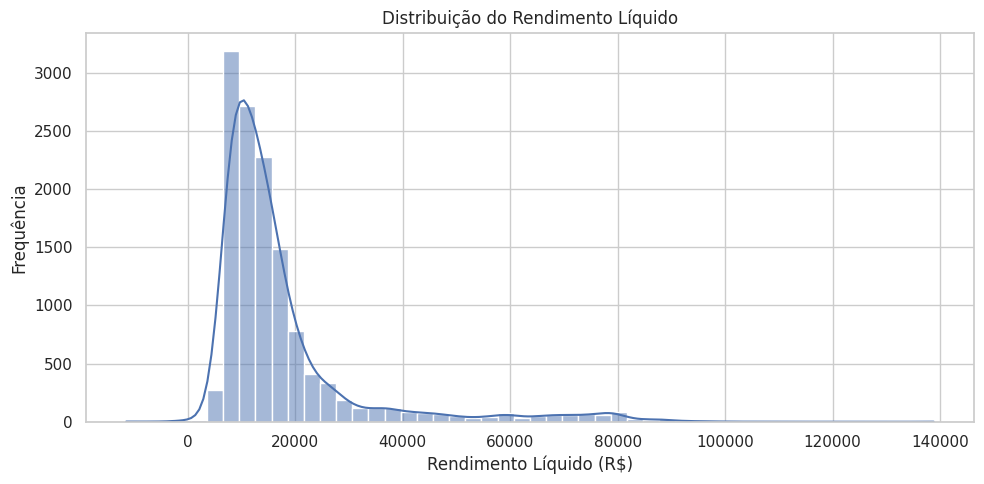

In [29]:
# Histograma do rendimento líquido
plt.figure(figsize=(10, 5))
sns.histplot(df['rendimento_líquido'].dropna(), bins=50, kde=True)
plt.title('Distribuição do Rendimento Líquido')
plt.xlabel('Rendimento Líquido (R$)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

**1. Quais faixas salariais são mais comuns?**
A maior concentração de salários está entre aproximadamente R 8.000eR  15.000, com o pico de frequência (modo da distribuição) em torno de R$ 10.000.

**2. A distribuição é simétrica ou assimétrica?**
A distribuição é assimétrica à direita (ou seja, assimetria positiva):
A cauda da curva é longa e se estende para valores maiores (acima de R 40.000,R$ 80.000, até  R$ 130.000).

Isso indica que há poucos rendimentos muito altos que distorcem a média.

**3. Há evidência de outliers?**
Sim. Há um grupo pequeno de rendimentos muito altos, além de R$ 60.000 até cercade R$ 140.000.

**4. A maior parte dos trabalhadores ganha abaixo de um certo valor?** Sim. Visualmente, mais de 75% dos rendimentos estão abaixo de R$ 20.000

***Removendo outliers - z-score robusto (univariado)***

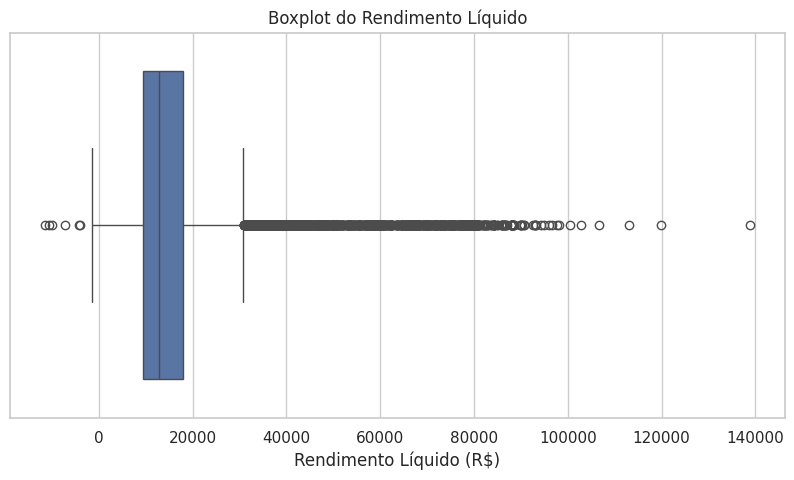

In [30]:
# Verificando os outliers para a variável 'rendimento_líquido' com Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['rendimento_líquido'])
plt.title('Boxplot do Rendimento Líquido')
plt.xlabel('Rendimento Líquido (R$)')
plt.show()

In [31]:
# Para fins deste exercício definimos os outliers como os rendimentos líquidos acima de R$ 100.000 e negativos
df3 = df[(df['rendimento_líquido'] > 0) & (df['rendimento_líquido'] < 100000)]
print(len(df3))

12914


In [32]:
df3['rendimento_líquido'].describe()

,rendimento_líquido
count,12914.000000
mean,17323.518777
std,14409.148136
min,111.300000
25%,9365.620000
50%,12962.870000
75%,17973.827500
max,98177.350000


<Axes: >

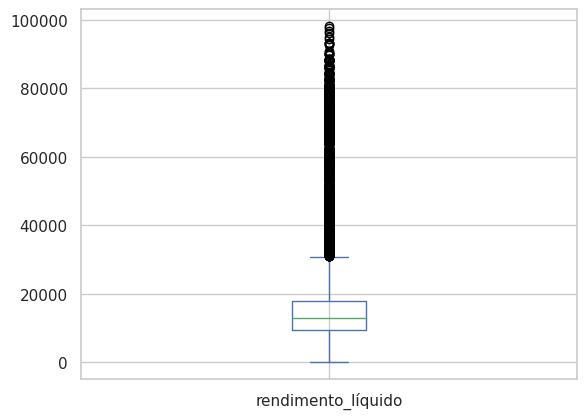

In [33]:
df3['rendimento_líquido'].plot.box()

<Axes: >

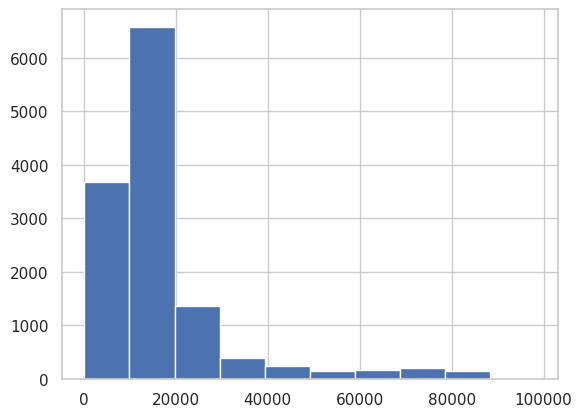

In [34]:
df3['rendimento_líquido'].hist()

/tmp/ipython-input-35-1972190707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['rendimento_líquido_log'] = df3['rendimento_líquido'].apply(lambda x: log10(x) if x > 0 else nan)


<Axes: >

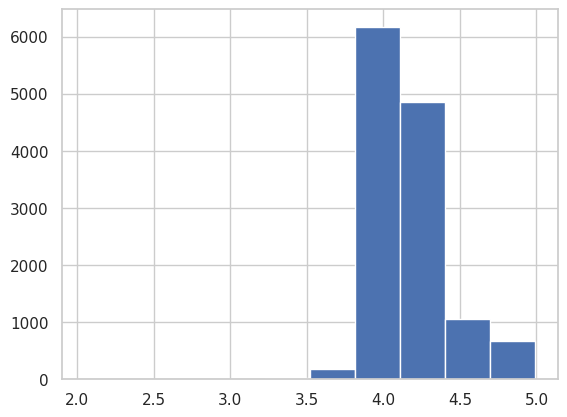

In [35]:
from numpy import log10, nan

df3['rendimento_líquido_log'] = df3['rendimento_líquido'].apply(lambda x: log10(x) if x > 0 else nan)

df3['rendimento_líquido_log'].dropna().hist()

In [ ]:
from numpy import abs
mad = abs(df3['rendimento_líquido_log'] - df3['rendimento_líquido_log'].median()).median()*(1/0.6745)
print(mad)

0.20971513344085332


<Axes: >

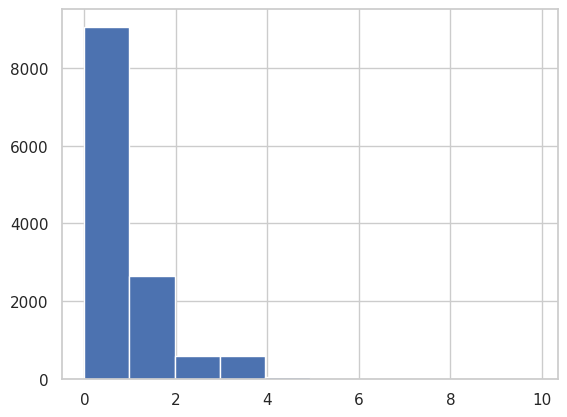

In [ ]:
(abs(df3['rendimento_líquido_log']-df3['rendimento_líquido_log'].median())/mad).hist()

In [ ]:
df3[abs(df3['rendimento_líquido_log']-df3['rendimento_líquido_log'].median())/mad > 3.0]

,nome,lotação,cargo,remuneração_paradigma,vantagens_pessoais,"subsídio,_diferença_de_subsídio,_função_de_confiança_ou_cargo_de_comissão",indenizações,vantagens_eventuais,gratificações,total_de_créditos,previdência_pública,imposto_de_renda,descontos_diversos,retenção_por_teto_constitucional,total_de_débitos,rendimento_líquido,remuneração_do_órgão_de_origem,diárias,rendimento_líquido_log
3,ABELARDO PAULO DA MATTA NETO,GAB DES ABELARDO PAULO DA MATTA NETO - SALVADOR,DESEMBARGADOR,41845.48,6804.93,0.0,6384.54,52648.78,0.00,103499.19,6804.93,11841.97,0.0,5940.66,24587.56,78911.63,0.0,0.0,4.897141
12,ABRAAO BARRETO CORDEIRO,VARA CRIM JURI EXEC PENAIS MEN - SANTO AMARO,JUIZ DE DIREITO,36192.16,0.00,0.0,4628.74,33691.96,0.00,72084.12,5278.82,7592.44,0.0,0.00,12871.26,59212.86,0.0,0.0,4.772416
35,ADALBERTO BOAVENTURA DOS SANTOS,PLANTAO JUDICIARIO DE 1ª GRAU - CGJ - SALVADOR,OFICIAL DE JUSTIÇA AVALIADOR,13639.41,11293.54,0.0,6053.29,76248.53,0.00,105780.77,4766.41,14480.80,0.0,0.00,19247.21,86533.56,0.0,0.0,4.937185
37,ADALBERTO LIMA BORGES FILHO,JURISDICAO PLENA - ITAPICURU,JUIZ DE DIREITO,33658.70,0.00,0.0,3119.56,28924.00,1682.94,66465.64,1142.04,6640.62,0.0,0.00,7782.66,58682.98,0.0,1000.0,4.768512
103,ADENIRES ROCHA FIGUEREDO DE SENA,CHEFIA DE GABINETE DA PRESIDENCIA - SALVADOR,OFICIAL DE JUSTIÇA AVALIADOR,10649.21,25634.58,0.0,2964.38,52875.77,0.00,91359.56,4587.72,15605.58,0.0,0.00,20193.30,71166.26,0.0,0.0,4.852274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12814,WILSON GOMES DE SOUZA JUNIOR,2ª VARA CRIMINAL - LAURO DE FREITAS,JUIZ DE DIREITO,38916.30,0.00,0.0,6091.63,35053.64,0.00,76169.94,5687.45,8124.93,0.0,0.00,13812.38,62357.56,0.0,0.0,4.794889
12818,WILSON NUNES DA SILVA JUNIOR,2ªV.FEITOS RELATIVOS REL DE CONSUMO CIVEIS E C...,JUIZ DE DIREITO,38916.30,6804.93,0.0,3233.19,52644.22,0.00,100565.45,6804.93,11841.97,0.0,1500.86,20147.76,80417.69,0.0,0.0,4.905352
12833,YAGO DALTRO FERRARO ALMEIDA,VARA CRIM JURI EXEC PENAIS MEN - ENTRE RIOS,JUIZ DE DIREITO,36192.16,0.00,0.0,5517.46,33495.20,0.00,71887.36,1142.04,8730.05,0.0,0.00,9872.09,62015.27,0.0,2000.0,4.792499
12837,YASMIN SOUZA DA SILVA,JURISDICAO PLENA - NOVA SOURE,JUIZ DE DIREITO,33658.70,0.00,0.0,5294.50,30360.75,1682.94,67902.39,1142.04,7900.07,0.0,0.00,9042.11,58860.28,0.0,3700.0,4.769822


***Removendo outliers - razão de duas variáveis (bivariado)***

Text(0, 0.5, 'Rendimento Líquido (R$)')

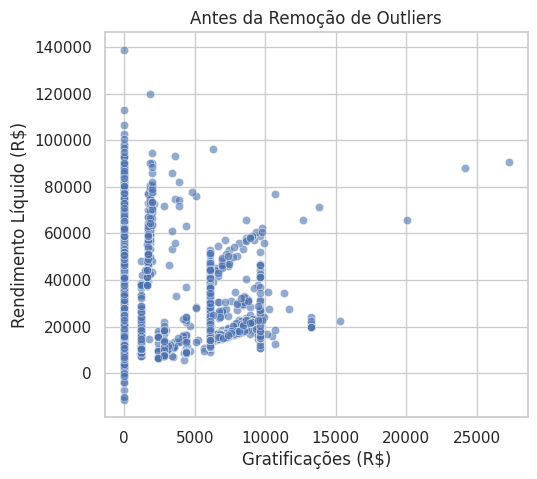

In [ ]:
# Gráfico de Dispersão com Destaque (ver como outliers aparecem em relação a outra variável)
# Isso mostra correlações atípicas: por exemplo, gratificações muito altas para um grupo pequeno.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='gratificações', y='rendimento_líquido', alpha=0.6)
plt.title('Antes da Remoção de Outliers')
plt.xlabel('Gratificações (R$)')
plt.ylabel('Rendimento Líquido (R$)')

In [ ]:
dados = df[['gratificações', 'rendimento_líquido']].dropna()

# Calcular os limites inferiores e superiores para cada variável
Q1 = df[['gratificações', 'rendimento_líquido']].quantile(0.25)
Q3 = df[['gratificações', 'rendimento_líquido']].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados dentro dos limites IQR para as duas variáveis
condicao = (
    (df['gratificações'] >= limite_inferior['gratificações']) & (df['gratificações'] <= limite_superior['gratificações']) &
    (df['rendimento_líquido'] >= limite_inferior['rendimento_líquido']) & (df['rendimento_líquido'] <= limite_superior['rendimento_líquido'])
)

# Aplicar o filtro
df4 = df[condicao].copy()
print(f"Número de registros após remoção bivariada de outliers: {len(df4)}")

Número de registros após remoção bivariada de outliers: 9604


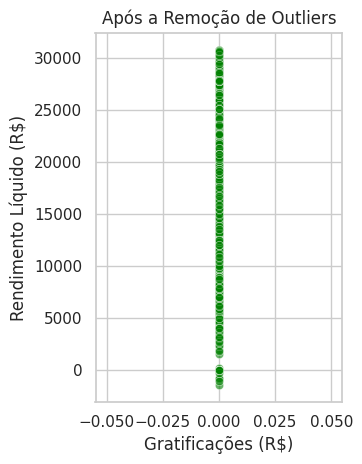

In [ ]:
plt.subplot(1, 2, 2)
sns.scatterplot(data=df4, x='gratificações', y='rendimento_líquido', alpha=0.6, color='green')
plt.title('Após a Remoção de Outliers')
plt.xlabel('Gratificações (R$)')
plt.ylabel('Rendimento Líquido (R$)')

plt.tight_layout()
plt.show()

***Removendo outliers - multivariado***

In [ ]:
df5 = df[(df['rendimento_líquido'] > 0) & (df['rendimento_líquido'] < 100000)]
df5 =df5.dropna()
print(len(df5))
print(df5.head())

12914
                            nome  \
0             ABDIAS LOPES PADRE   
1       ABEDNIGO SILVA DA PAIXAO   
2          ABEL SANTANA DOS REIS   
3   ABELARDO PAULO DA MATTA NETO   
4  ABELARDO VIRGINIO DE CARVALHO   

                                             lotação  \
0                  JURISDICAO PLENA - BARRA DO CHOCA   
1  VARA DO SISTEMA DOS JUIZADOS ESPECIAIS - SENHO...   
2                  1A VARA FAZENDA PUBLICA - ITABUNA   
3    GAB DES ABELARDO PAULO DA MATTA NETO - SALVADOR   
4                                SALVADOR - SALVADOR   

                                cargo  remuneração_paradigma  \
0  ASSESSOR DE JUIZ - LEI 10.845/2007                6527.24   
1              TÉCNICO DE NÍVEL MÉDIO                5676.62   
2                         SUBESCRIVÃO                6613.09   
3                       DESEMBARGADOR               41845.48   
4                       DESEMBARGADOR               41845.48   

   vantagens_pessoais  \
0             2812.20   
1    

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12914 entries, 0 to 12943
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   nome                                                                       12914 non-null  object 
 1   lotação                                                                    12914 non-null  object 
 2   cargo                                                                      12914 non-null  object 
 3   remuneração_paradigma                                                      12914 non-null  float64
 4   vantagens_pessoais                                                         12914 non-null  float64
 5   subsídio,_diferença_de_subsídio,_função_de_confiança_ou_cargo_de_comissão  12914 non-null  float64
 6   indenizações                                               

In [ ]:
df5['nome'] = df5['nome'].astype('category')
df5['lotação'] = df5['lotação'].astype('category')
df5['cargo'] = df5['cargo'].astype('category')

In [ ]:
df5['nome'] = df5['nome'].cat.codes
df5['lotação'] = df5['lotação'].cat.codes
df5['cargo'] = df5['cargo'].cat.codes

In [ ]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(df5)

IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x79BD34B6A940)

In [ ]:
scores = clf.predict(df5)

In [ ]:
scores

array([-1,  1,  1, ...,  1, -1,  1])

In [ ]:
df5['outlier'] = scores
print(df5.head())

   nome  lotação  cargo  remuneração_paradigma  vantagens_pessoais  \
0     0     1095     26                6527.24             2812.20   
1     1     1648    204                5676.62             2314.05   
2     2       66    188                6613.09             1521.56   
3     3      930    124               41845.48             6804.93   
4     4     1416    124               41845.48                0.00   

   subsídio,_diferença_de_subsídio,_função_de_confiança_ou_cargo_de_comissão  \
0                                            1816.91                           
1                                               0.00                           
2                                               0.00                           
3                                               0.00                           
4                                               0.00                           

   indenizações  vantagens_eventuais  gratificações  total_de_créditos  \
0       3166.46         

In [ ]:
df5[df5['outlier'] == -1]

,nome,lotação,cargo,remuneração_paradigma,vantagens_pessoais,"subsídio,_diferença_de_subsídio,_função_de_confiança_ou_cargo_de_comissão",indenizações,vantagens_eventuais,gratificações,total_de_créditos,previdência_pública,imposto_de_renda,descontos_diversos,retenção_por_teto_constitucional,total_de_débitos,rendimento_líquido,remuneração_do_órgão_de_origem,diárias,outlier
0,0,1095,26,6527.24,2812.20,1816.91,3166.46,28110.96,6056.38,47523.69,2415.21,6559.47,0.0,0.00,8974.68,38549.01,0.0,0.0,-1
3,3,930,124,41845.48,6804.93,0.00,6384.54,52648.78,0.00,103499.19,6804.93,11841.97,0.0,5940.66,24587.56,78911.63,0.0,0.0,-1
4,4,1416,124,41845.48,0.00,0.00,4184.54,0.00,0.00,41845.48,5443.72,0.00,0.0,0.00,5443.72,36401.76,0.0,0.0,-1
12,12,1580,157,36192.16,0.00,0.00,4628.74,33691.96,0.00,72084.12,5278.82,7592.44,0.0,0.00,12871.26,59212.86,0.0,0.0,-1
31,31,1214,147,6787.06,6320.47,0.00,3067.33,26275.65,4390.81,45973.99,2151.96,6751.00,0.0,0.00,8902.96,37071.03,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12893,12846,1416,157,38916.30,0.00,0.00,1297.13,0.00,0.00,38916.30,5004.34,0.00,0.0,0.00,5004.34,33911.96,0.0,0.0,-1
12917,12869,1021,176,10336.78,12156.01,0.00,2886.04,10336.78,0.00,35029.57,4757.74,6728.28,0.0,0.00,11486.02,23543.55,0.0,0.0,-1
12931,12883,848,71,0.00,482.99,4390.85,2703.70,0.00,4390.87,11464.71,1297.06,1282.37,0.0,0.00,2579.43,8885.28,0.0,0.0,-1
12932,12884,1416,33,12711.77,24661.77,0.00,672.44,0.00,0.00,37373.54,4756.23,7506.83,0.0,0.00,12263.06,25110.48,0.0,0.0,-1


In [ ]:
df5 = df5[df5['outlier'] != -1]
len(df5)

10889

# **3. Estatísticas Descritivas + Visualizações**

In [ ]:
# Estatísticas básicas do rendimento líquido
print("\nResumo estatístico do rendimento líquido:")
print(df['rendimento_líquido'].describe())


Resumo estatístico do rendimento líquido:
count     12940.000000
mean      17337.386934
std       14567.819518
min      -11404.390000
25%        9347.037500
50%       12952.300000
75%       17973.242500
max      138792.140000
Name: rendimento_líquido, dtype: float64


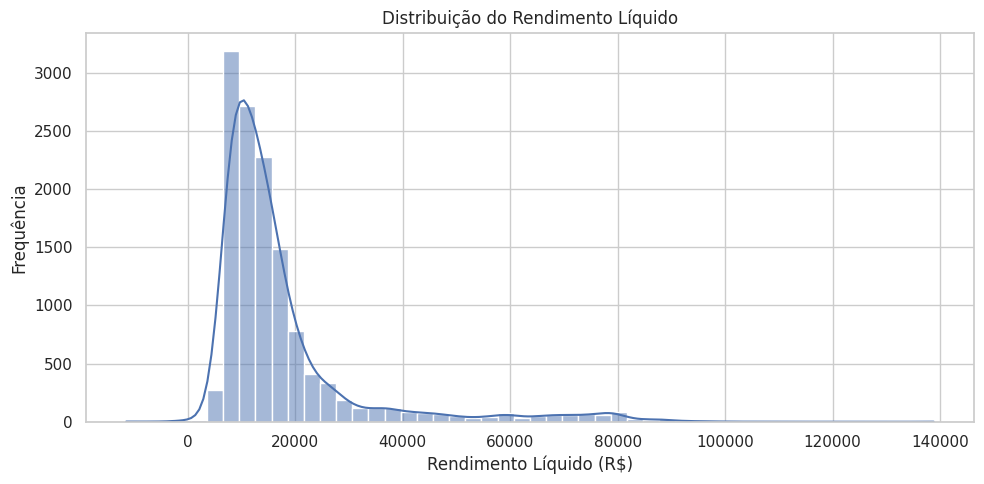

In [ ]:
# Histograma do rendimento líquido
plt.figure(figsize=(10, 5))
sns.histplot(df['rendimento_líquido'].dropna(), bins=50, kde=True)
plt.title('Distribuição do Rendimento Líquido')
plt.xlabel('Rendimento Líquido (R$)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

**1. Quais faixas salariais são mais comuns?**
A maior concentração de salários está entre aproximadamente R 8.000eR 15.000, com o pico de frequência (modo da distribuição) em torno de R$ 10.000.

**2. A distribuição é simétrica ou assimétrica?**
A distribuição é assimétrica à direita (ou seja, assimetria positiva): A cauda da curva é longa e se estende para valores maiores (acima de R$ 40.000, R$ 80.000, até R$ 130.000).

Isso indica que há poucos rendimentos muito altos que distorcem a média.

**3. Há evidência de outliers?** Sim. Há um grupo pequeno de rendimentos muito altos, além de R$ 60.000 até cerca de R$ 140.000.

**4. A maior parte dos trabalhadores ganha abaixo de um certo valor?** Sim. Visualmente, mais de 75% dos rendimentos estão abaixo de R$ 20.000.

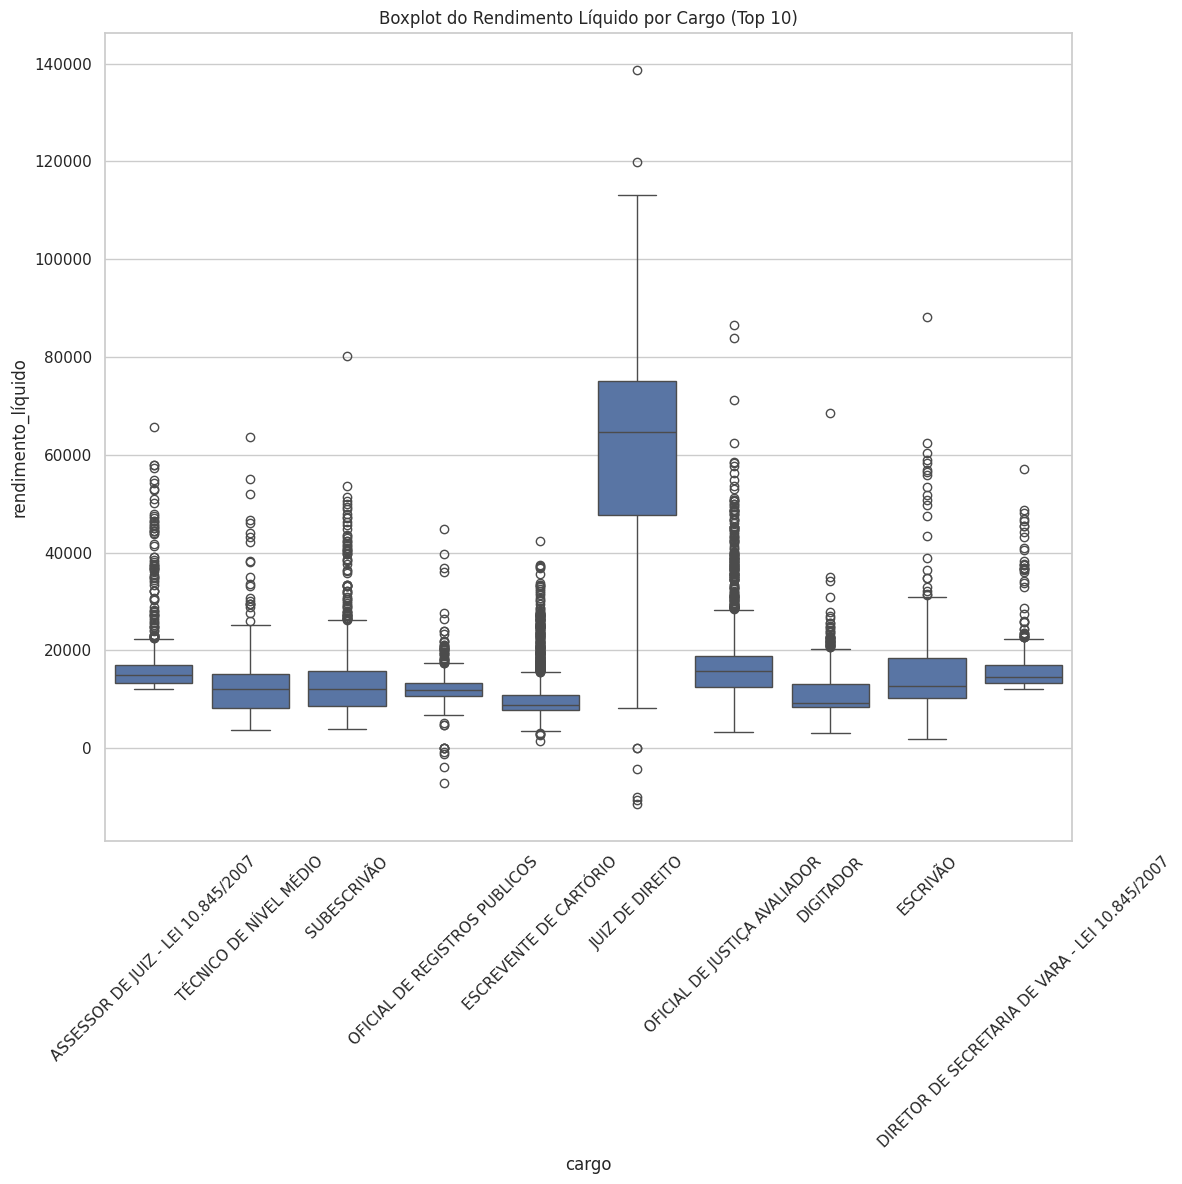

In [ ]:
# Boxplot de rendimento líquido por cargo (limitado aos 10 cargos mais frequentes)
top_cargos = df['cargo'].value_counts().head(10).index
df_top_cargos = df[df['cargo'].isin(top_cargos)]

plt.figure(figsize=(12, 12))
sns.boxplot(data=df_top_cargos, x='cargo', y='rendimento_líquido')
plt.title('Boxplot do Rendimento Líquido por Cargo (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **4. Teste de Hipóteses**

In [ ]:
# comparar rendimentos líquidos entre magistrados e técnicos

# Criar uma coluna simplificada de grupo (Magistrado vs Outros)
df['grupo'] = df['cargo'].apply(lambda x: 'Magistrado' if 'DESEMBARGADOR' in x.upper() or 'JUIZ' in x.upper() else 'Servidor')

# Separar os grupos
grupo1 = df[df['grupo'] == 'Magistrado']['rendimento_líquido'].dropna()
grupo2 = df[df['grupo'] == 'Servidor']['rendimento_líquido'].dropna()

# Teste de hipótese (Mann-Whitney U, pois os dados não são normalmente distribuídos)
stat, p = stats.mannwhitneyu(grupo1, grupo2, alternative='two-sided')

print("\nTeste de Hipótese: Diferença de Rendimento entre Magistrados e Servidores")
print(f"Estatística U = {stat:.2f}, p-valor = {p:.4f}")
if p < 0.05:
    print("Resultado: Diferença significativa entre os grupos.")
else:
    print("Resultado: Não há diferença estatística significativa.")



Teste de Hipótese: Diferença de Rendimento entre Magistrados e Servidores
Estatística U = 15637327.00, p-valor = 0.0000
Resultado: Diferença significativa entre os grupos.


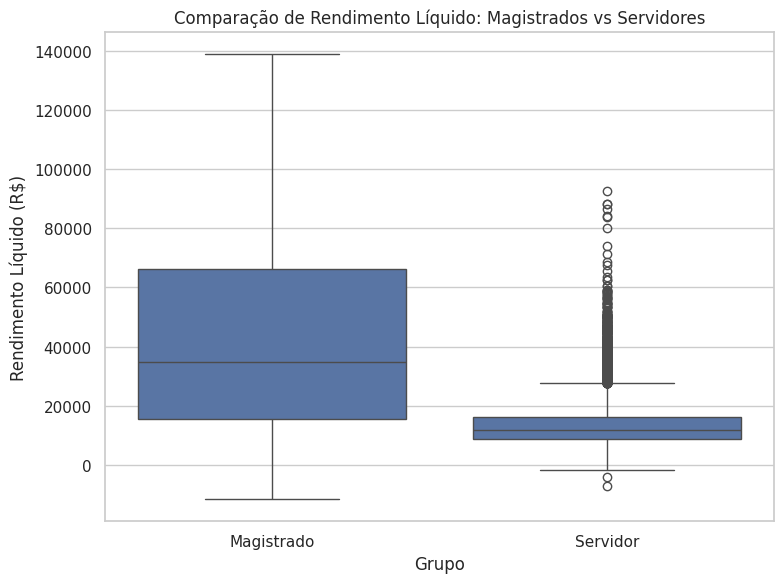

In [ ]:
# Boxplot para visualização da diferença
plt.figure(figsize=(8, 6))
sns.boxplot(x='grupo', y='rendimento_líquido', data=df)
plt.title('Comparação de Rendimento Líquido: Magistrados vs Servidores')
plt.ylabel('Rendimento Líquido (R$)')
plt.xlabel('Grupo')
plt.tight_layout()
plt.show()